In [4]:
import os
import pandas as pd

#导入数据
files=os.listdir()
create=locals()
for file in files:
    if file.endswith("csv"):
        create[file.split('.')[0]]=pd.read_csv(file,encoding='gbk')
        print(file.split('.')[0])

c:\python36\install\lib\site-packages\matplotlib\__init__.py:1067: UserWarning: Duplicate key in file "c:\python36\install\lib\site-packages\matplotlib\mpl-data\matplotlibrc", line #207
  (fname, cnt))


accounts
card
clients
disp
district
loans
order
trans


c:\python36\install\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#生成被解释变量bad_good
bad_good={'B':1,'D':1,'A':0,'C':2}
loans['bad_good']=loans.status.map(bad_good)
loans.head()

,loan_id,account_id,date,amount,duration,payments,status,bad_good
0,5314,1787,1993-07-05,96396,12,8033,B,1
1,5316,1801,1993-07-11,165960,36,4610,A,0
2,6863,9188,1993-07-28,127080,60,2118,A,0
3,5325,1843,1993-08-03,105804,36,2939,A,0
4,7240,11013,1993-09-06,274740,60,4579,A,0


In [14]:
#表征信息（性别，年龄等客户信息）

data2=pd.merge(loans,disp,on='account_id',how='left')
data2=pd.merge(data2,clients,on='client_id',how='left')
data2=data2[data2.type=='所有者']
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 826
Data columns (total 14 columns):
loan_id        682 non-null int64
account_id     682 non-null int64
date           682 non-null object
amount         682 non-null int64
duration       682 non-null int64
payments       682 non-null int64
status         682 non-null object
bad_good       682 non-null int64
disp_id        682 non-null int64
client_id      682 non-null int64
type           682 non-null object
sex            682 non-null object
birth_date     682 non-null object
district_id    682 non-null int64
dtypes: int64(9), object(5)
memory usage: 66.6+ KB


In [17]:
#状态信息（客户的社会经济状态和社会网络关系）
data3=pd.merge(data2,district,left_on='district_id',right_on='A1',how='left')
data3.head()

,loan_id,account_id,date,amount,duration,payments,status,bad_good,disp_id,client_id,...,A1,GDP,A4,A10,A11,A12,A13,A14,A15,a16
0,5314,1787,1993-07-05,96396,12,8033,B,1,2166,2166,...,30,16979,94812,81.8,9650,3.38,3.67,100,15.7,14.8
1,5316,1801,1993-07-11,165960,36,4610,A,0,2181,2181,...,46,14111,112709,73.5,8369,1.79,2.31,117,12.7,11.6
2,6863,9188,1993-07-28,127080,60,2118,A,0,11006,11314,...,45,12888,77917,53.5,8390,2.28,2.89,132,13.3,13.6
3,5325,1843,1993-08-03,105804,36,2939,A,0,2235,2235,...,14,31891,177686,74.8,10045,1.42,1.71,135,18.6,17.7
4,7240,11013,1993-09-06,274740,60,4579,A,0,13231,13539,...,63,11322,86513,50.5,8288,3.79,4.52,110,9.0,8.4


In [21]:
#行为信息(根据客户的账户变动的行为信息，考察借款人的还款能力，如账户平均余额，余额的标准差，变异系数，平均入账和平均支出的比例，贷存比等)
data4_1=pd.merge(loans[['account_id','date']],trans[['account_id','type','amount','balance','date']],on='account_id')
data4_1.columns=['account_id','date','type','amount','balance','t_date']
data4_1=data4_1.sort_values(by=['account_id','t_date'])

#日期变量转换为日期
data4_1['date']=pd.to_datetime(data4_1['date'])
data4_1['t_date']=pd.to_datetime(data4_1['t_date'])

#账户余额和交易额度有千分位符，进行数据清洗，并转化为数值类型
data4_1['balance2']=data4_1['balance'].map(lambda x:int(''.join(x[1:].split(','))))
data4_1['amount2']=data4_1['amount'].map(lambda x:int(''.join(x[1:].split(','))))
data4_1.head()

,account_id,date,type,amount,balance,t_date,balance2,amount2
10020,2,1994-01-05,贷,"$1,100","$1,100",1993-02-26,1100,1100
10021,2,1994-01-05,贷,$20236,$21336,1993-03-12,21336,20236
10022,2,1994-01-05,贷,"$3,700",$25036,1993-03-28,25036,3700
10023,2,1994-01-05,贷,$14,$25050,1993-03-31,25050,14
10024,2,1994-01-05,贷,$20236,$45286,1993-04-12,45286,20236


In [30]:
#窗口取数（只保留了贷款日期前365天至贷款前1天内的交易数据）
import datetime

data4_2=data4_1[data4_1.date>data4_1.t_date][data4_1.date<data4_1.t_date+datetime.timedelta(days=365)]
data4_2.head()

c:\python36\install\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,account_id,date,type,amount,balance,t_date,balance2,amount2
10020,2,1994-01-05,贷,"$1,100","$1,100",1993-02-26,1100,1100
10021,2,1994-01-05,贷,$20236,$21336,1993-03-12,21336,20236
10022,2,1994-01-05,贷,"$3,700",$25036,1993-03-28,25036,3700
10023,2,1994-01-05,贷,$14,$25050,1993-03-31,25050,14
10024,2,1994-01-05,贷,$20236,$45286,1993-04-12,45286,20236


In [32]:
#账户平均余额（代表财富水平）、余额的标准差（代表财富稳定情况）、变异系数（代表财富稳定情况的另一个指标）


data4_3=data4_2.groupby('account_id')['balance2'].agg([('avg_balance','mean'),('stdev_balance','std')])
data4_3['cv_balance']=data4_3[['avg_balance','stdev_balance']].apply(lambda x:x[1]/x[0],axis=1)
data4_3.head()

,avg_balance,stdev_balance,cv_balance
account_id,,,
2,32590.759259,12061.802206,0.370099
19,25871.223684,15057.521648,0.582018
25,56916.984496,21058.667949,0.369989
37,36658.981308,20782.996690,0.566928
38,31383.581818,10950.723180,0.348932


In [35]:
#平均支出和平均收入的比例

type_dict={'借':'out','贷':'income'}
data4_2['type1']=data4_2.type.map(type_dict)
data4_4=data4_2.groupby(['account_id','type1'])[['amount2']].sum()
data4_5=pd.pivot_table(data4_4,values='amount2',index='account_id',columns='type1')
data4_5.fillna(0,inplace=True)
data4_5['r_out_in']=data4_5[['out','income']].apply(lambda x:x[0]/x[1],axis=1)
data4_5.head()

type1,income,out,r_out_in
account_id,,,
2,276514.0,153020.0,0.553390
19,254255.0,198020.0,0.778824
25,726479.0,629108.0,0.865969
37,386357.0,328541.0,0.850356
38,154300.0,105091.0,0.681082


In [38]:
#将计算出的特征变量合并

data4=pd.merge(data3,data4_3,left_on='account_id',right_index=True,how='left')
data4=pd.merge(data4,data4_5,left_on='account_id',right_index=True,how='left')


#计算贷存比，贷收比
data4['r_lb']=data4[['amount','avg_balance']].apply(lambda x:x[0]/x[1],axis=1)
data4['r_li']=data4[['amount','income']].apply(lambda x:x[0]/x[1],axis=1)

data4.head()

,loan_id,account_id,date,amount,duration,payments,status,bad_good,disp_id,client_id,...,A15,a16,avg_balance,stdev_balance,cv_balance,income,out,r_out_in,r_lb,r_li
0,5314,1787,1993-07-05,96396,12,8033,B,1,2166,2166,...,15.7,14.8,12250.000000,8330.866301,0.680071,20100.0,0.0,0.000000,7.869061,4.795821
1,5316,1801,1993-07-11,165960,36,4610,A,0,2181,2181,...,12.7,11.6,43975.810811,25468.748605,0.579154,243576.0,164004.0,0.673318,3.773893,0.681348
2,6863,9188,1993-07-28,127080,60,2118,A,0,11006,11314,...,13.3,13.6,30061.041667,11520.127013,0.383224,75146.0,54873.0,0.730219,4.227398,1.691108
3,5325,1843,1993-08-03,105804,36,2939,A,0,2235,2235,...,18.6,17.7,41297.640000,14151.357776,0.342667,120310.0,86018.0,0.714970,2.561987,0.879428
4,7240,11013,1993-09-06,274740,60,4579,A,0,13231,13539,...,9.0,8.4,49780.777778,22172.541600,0.445404,276327.0,235214.0,0.851216,5.518998,0.994257


In [41]:
#建模(构建Logistic模型)


data_model=data4[data4.status!='C']
for_predict=data4[data4.status=='C']

train=data_model.sample(frac=0.7,random_state=1235).copy()
test = data_model[~ data_model.index.isin(train.index)].copy()
print(' 训练集样本量: %i \n 测试集样本量: %i' %(len(train), len(test)))

 训练集样本量: 195 
 测试集样本量: 84


In [115]:
# 向前法
def forward_select(data, response):
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = smf.glm(
                formula=formula, data=data, 
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score:
            #print(current_score)
            #print(best_candidate)
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = smf.glm(
        formula=formula, data=data, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [116]:
#使用向前逐步法进行逻辑回归建模
candidates = ['bad_good', 'A1', 'GDP', 'A4', 'A10', 'A11', 'A12','amount', 'duration',
       'A13', 'A14', 'A15', 'a16', 'avg_balance', 'stdev_balance',
       'cv_balance', 'income', 'out', 'r_out_in', 'r_lb', 'r_li']
data_for_select = train[candidates]

lg_m1 = forward_select(data=data_for_select, response='bad_good')
lg_m1.summary().tables[1]

aic is 167.4331143250464,continuing!
aic is 135.8243585604184,continuing!
forward selection over!
final formula is bad_good ~ r_lb + cv_balance 


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-7.4260,1.125,-6.599,0.000,-9.632,-5.220
r_lb,0.4391,0.094,4.651,0.000,0.254,0.624
cv_balance,10.1355,2.094,4.841,0.000,6.032,14.239


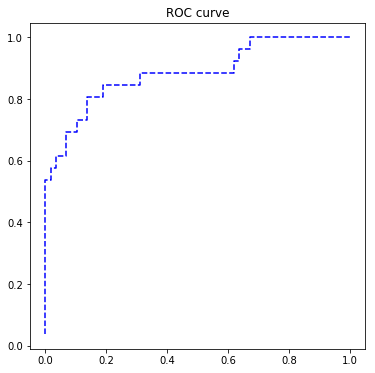

In [117]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr, tpr, th = metrics.roc_curve(test.bad_good, lg_m1.predict(test))
plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, 'b--')
plt.title('ROC curve')
plt.show()

In [120]:
print('AUC = %.4f' %metrics.auc(fpr, tpr))
for_predict['prob']=lg_m1.predict(for_predict)
for_predict[['account_id','prob']].head()

AUC = 0.8846


c:\python36\install\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,account_id,prob
23,1071,0.704914
30,5313,0.852249
38,10079,0.118128
39,5385,0.177591
42,8321,0.024302


In [100]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


#填补A12里的缺失值
train['A12']=train.A12.fillna(train.A12.median())
test['A12']=test.A12.fillna(test.A12.median())

formula='''bad_good~A12+A13
       +cv_balance+r_lb+r_li'''

model = smf.glm(
        formula=formula, data=train, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
#model
model.summary().tables[1]
'''
+a16,+r_out_in
'''

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-7.6457,1.222,-6.256,0.000,-10.041,-5.250
A12,0.2563,0.776,0.330,0.741,-1.264,1.777
A13,-0.2516,0.666,-0.378,0.706,-1.557,1.054
cv_balance,10.9974,2.264,4.858,0.000,6.560,15.434
r_lb,0.3377,0.121,2.792,0.005,0.101,0.575
r_li,0.4457,0.385,1.158,0.247,-0.309,1.200


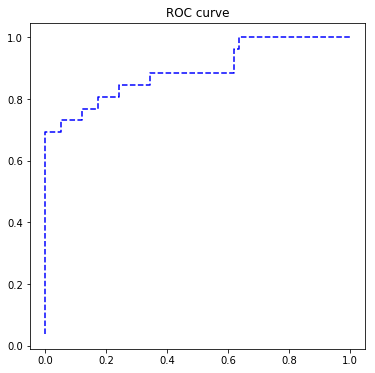

In [101]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr, tpr, th = metrics.roc_curve(test.bad_good, model.predict(test))
plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, 'b--')
plt.title('ROC curve')
plt.show()

In [94]:
print('AUC = %.4f' %metrics.auc(fpr, tpr))

AUC = 0.8926


In [130]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


#填补A12里的缺失值
train['A12']=train.A12.fillna(train.A12.median())
test['A12']=test.A12.fillna(test.A12.median())

formula='''bad_good~A14+A12+A13+stdev_balance+duration
       +cv_balance+r_lb+r_li'''

model = smf.glm(
        formula=formula, data=train, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
#model
'''
+stdev_balance+duration
'''
model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-3.2409,2.921,-1.110,0.267,-8.965,2.484
A14,-0.0306,0.018,-1.671,0.095,-0.066,0.005
A12,0.1495,0.847,0.177,0.860,-1.510,1.810
A13,-0.4354,0.730,-0.596,0.551,-1.866,0.995
stdev_balance,-2.186e-05,5.68e-05,-0.385,0.700,-0.000,8.95e-05
duration,0.0225,0.022,1.005,0.315,-0.021,0.066
cv_balance,11.7431,3.036,3.868,0.000,5.793,17.694
r_lb,0.2608,0.148,1.763,0.078,-0.029,0.551
r_li,0.4563,0.387,1.180,0.238,-0.301,1.214


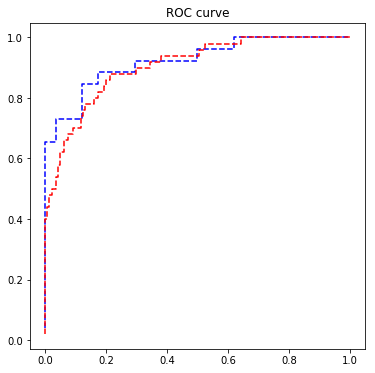

In [131]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr_test, tpr_test, th_test = metrics.roc_curve(test.bad_good, model.predict(test))
fpr_train, tpr_train, th_train = metrics.roc_curve(train.bad_good, model.predict(train))
plt.figure(figsize=[6, 6])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r--')
plt.title('ROC curve')
plt.show()

In [133]:
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test))

AUC = 0.9224


In [134]:
for_predict['prob']=model.predict(for_predict)
for_predict[['account_id','prob']].head()

c:\python36\install\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,account_id,prob
23,1071,0.841721
30,5313,0.840833
38,10079,0.336044
39,5385,0.410357
42,8321,0.030717
